## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tr

Epoch 41/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.8333 - acc: 0.7004 - val_loss: 1.9195 - val_acc: 0.4362
Epoch 42/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8252 - acc: 0.7038 - val_loss: 1.6493 - val_acc: 0.5001
Epoch 43/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.7873 - acc: 0.7165 - val_loss: 2.2890 - val_acc: 0.4164
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.7848 - acc: 0.7190 - val_loss: 1.7333 - val_acc: 0.4916
Epoch 45/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.7631 - acc: 0.7261 - val_loss: 1.7054 - val_acc: 0.4999
Epoch 46/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.7354 - acc: 0.7369 - val_loss: 1.8169 - val_acc: 0.4760
Epoch 47/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.7433 - acc: 0.7332 - val_loss: 2.0323 - val_acc: 0.4489
Epoch 48/50
50000/50000 [=========

50000/50000 [==============================] - 3s 69us/step - loss: 1.1055 - acc: 0.6100 - val_loss: 1.3692 - val_acc: 0.5193
Epoch 43/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.1025 - acc: 0.6119 - val_loss: 1.3903 - val_acc: 0.5093
Epoch 44/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.0926 - acc: 0.6169 - val_loss: 1.5057 - val_acc: 0.4815
Epoch 45/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.0814 - acc: 0.6175 - val_loss: 1.3912 - val_acc: 0.5148
Epoch 46/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.0719 - acc: 0.6226 - val_loss: 1.3607 - val_acc: 0.5232
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.0600 - acc: 0.6281 - val_loss: 1.3925 - val_acc: 0.5084
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.0518 - acc: 0.6292 - val_loss: 1.3872 - val_acc: 0.5084
Epoch 49/50
50000/50000 [=====================

Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5958 - acc: 0.4434 - val_loss: 1.6067 - val_acc: 0.4380
Epoch 45/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5908 - acc: 0.4437 - val_loss: 1.6074 - val_acc: 0.4363
Epoch 46/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5867 - acc: 0.4455 - val_loss: 1.5977 - val_acc: 0.4442
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5820 - acc: 0.4462 - val_loss: 1.6005 - val_acc: 0.4384
Epoch 48/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.5777 - acc: 0.4476 - val_loss: 1.5930 - val_acc: 0.4416
Epoch 49/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5739 - acc: 0.4490 - val_loss: 1.5914 - val_acc: 0.4405
Epoch 50/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5696 - acc: 0.4513 - val_loss: 1.5862 - val_acc: 0.4408
Experiment with LR = 0.000100
____

50000/50000 [==============================] - 3s 69us/step - loss: 1.9115 - acc: 0.3399 - val_loss: 1.9119 - val_acc: 0.3324
Epoch 46/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9081 - acc: 0.3416 - val_loss: 1.9088 - val_acc: 0.3348
Epoch 47/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9049 - acc: 0.3427 - val_loss: 1.9055 - val_acc: 0.3357
Epoch 48/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9017 - acc: 0.3433 - val_loss: 1.9025 - val_acc: 0.3363
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8986 - acc: 0.3448 - val_loss: 1.8995 - val_acc: 0.3387
Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8957 - acc: 0.3457 - val_loss: 1.8966 - val_acc: 0.3407
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)  

Epoch 47/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2170 - acc: 0.2158 - val_loss: 2.2183 - val_acc: 0.2174
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2154 - acc: 0.2174 - val_loss: 2.2166 - val_acc: 0.2175
Epoch 49/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2138 - acc: 0.2185 - val_loss: 2.2150 - val_acc: 0.2195
Epoch 50/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2122 - acc: 0.2197 - val_loss: 2.2134 - val_acc: 0.2198


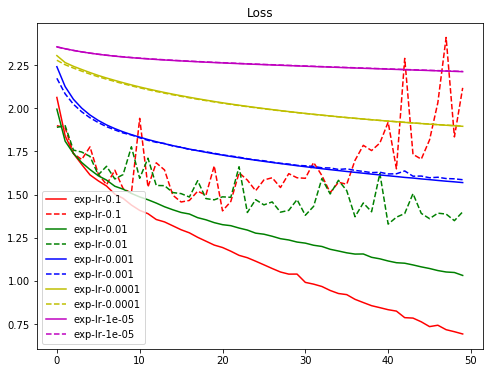

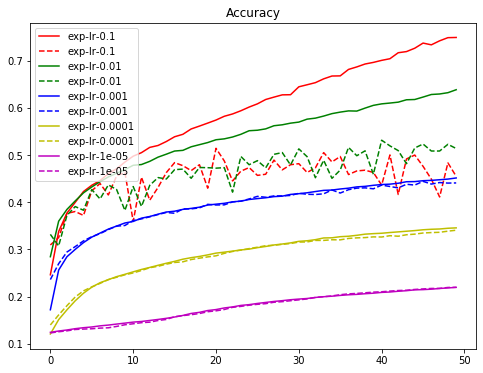

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()